# Exploration, appraisal, production and reserves: oil and lithium  

In this notebook we consider the issue of resource availability. 


## Reserve definitions  
The **proven reserve** of a natural resource is defined as the quantity estimated with reasonable certainty, from analysis of geologic and engineering data, to be recoverable from well established or known sources with existing equipment and operating conditions.  

In the oil industry, proven reserves (also referred to as P1 or P90) are classified as having a 90% or greater likelihood of being present and economically viable for extraction in current conditions. Similar rules exist for the minerals industry. Proven reserves take into account the technology used for extraction, regional regulations, and market conditions. Hence, proven reserves can take sudden leaps and drops. Extraction companies usually have to disclose proven reserves due to regulations, but keep as much information as they can secret to give themselves competitive advantage.  

**Technically recoverable** reserves are known to exist with high certainty but are not economically profitable (with existing technology). They are not included in proven reserves. 

**Probable reserves** have a 50-90% probability of being present and economic.  

**Possible reserves** plausibly exist, but with a less than 50% probability. This usually reflects a lack of exploration and appraisal data that reduce uncertainty.  

**Key points**
* Proven reserves are a small subset of the possible reserves.
* Proven reserves change due to exploration and appraisal programs AND economic, technology and regulatory conditions.
* Investment in exploration and appraisal occurs when future production becomes threatened by availability (not before).



## Oil proven reserves  

Load historical oil production and proven reserves data.  
The file path is `"../DATA/oil/bp-stats-review-2021-oil-summary_RS.csv"`.  

**Plot a figure with three time series** (can be separate plots and then combined in Word).
* Oil production (MMBL/day).
* Oil proven reserves (BMBL).
* Oil R/P (years).

MMBL unit is millions of metric barrels. 1 metric barrel (MBL) is 0.159 cubic metres.  
BMBL unit is billions of metric barrels (1 BMBL = 1000 MMBL).  

The R/P statistic is the ratio of proven reserves (R) to production (P) at the time of reserve estimation. R/P usually has units of years (there are 365.25 days in a year, on average). It is useful because it is a crude measure of how quickly the proven reserves will be exhausted.  

Are we going to run out of oil? What do you conclude from the R/P plot about exploration, appraisal, and petroleum industry expectations?


In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Force use of TrueType fonts in pdfs for later editing
from matplotlib import rc
rc("pdf", fonttype=42)

## Lithium demand and supply

We can use our model of energy transition to make a ballpark estimate for how much lithium is needed, if we assume that lithium will be a primary ingredient to store energy before it is used.  

Industrial electricity supply requires low-cost low-maintenance storage, whereas most electricity use (e.g. electric cars) requires storage with high-energy-density (low weight) and fast charging capability (e.g. Trahey et al., 2020). Both applications are now feasible with lithium-based batteries, which are becomimg cheap: the levelized cost of energy (LCOE) for utility-scale (grid) Li battery installations dropped from 800 USD/MWh in 2013 to 200 USD/MWh in 2018 (BNEF, 2020). Other battery technologies or chemical energy storage (e.g. hydrogen) may become a reality in future, but let's start by considering the present front-runner: lithium (Li).

Let's assume battery storage built into new solar or wind power plants will be equivalent to 4 hours of maximum generation capacity, which is realistic (BNEF, 2020), but not yet normal. Let's take a simple model and assume 12.5% efficiency for solar and 25% for wind (IRENA, 2020). So, for solar energy, the storage needed is equivalent to 4/0.125 = 32 hours of consumption. We can hence calculate how much storage capacity we would need in any particular year, to accompany new generation capacity. 

Batteries used in Tesla cars contain about 170 g/kWh = 170,000 tons/TWh of lithium; and the theoretical minimum is 70-80 g/kWh (Martin, 2017). We will assume 170 g/kWh.  


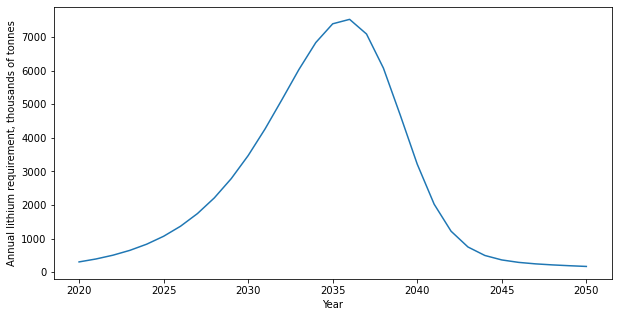

Total lithium needed in year 2019 (thousands of metric tons, kMT) [238.51842345]
Total lithium needed before 2050 (millions of metric tons, MMT) [80.61531621]


In [2]:
eYear = np.load('eYear.npy')
eSolar = np.load('eSolar.npy')
eWind = np.load('eWind.npy')

# New generation each year
newESolar = np.gradient(eSolar)
newEWind  = np.gradient(eWind)

hoursInYear = 365.25 * 24
storageNeededTWh = (newESolar/0.125 + newEWind/0.25) * 4 / hoursInYear

LiNeededThousandsOfTons = 170*storageNeededTWh

totalLithiumMillionsTons = np.cumsum(LiNeededThousandsOfTons)/1000

np.save('LiNeededThousandsOfTons.npy',LiNeededThousandsOfTons)
np.save('totalLithiumMillionsTons.npy',totalLithiumMillionsTons)

sel = np.logical_and(eYear >= 2020, eYear <= 2050) 
plt.figure(figsize=[10,5])
plt.plot(eYear[sel], LiNeededThousandsOfTons[sel])
plt.xlabel('Year')
plt.ylabel('Annual lithium requirement, thousands of tonnes')
plt.show()

print("Total lithium needed in year 2019 (thousands of metric tons, kMT)",LiNeededThousandsOfTons[eYear == 2019])
print("Total lithium needed before 2050 (millions of metric tons, MMT)",totalLithiumMillionsTons[eYear == 2050])


## Analysis: does this seem possible?  

**Make a plot of historical lithium production, reserves, and R/P.**  
Use the datafile `'DATA/lithium/Li_mine_production.csv'`.  

What are the historical R/P ratios? Has there been plenty available to meet past demand? Is it plausible that enough lithium will be available for future energy transition? In the timeframe we need it?  

Compare the predicted lithium requirement in year 2019 (see code cell above) with what was actually produced. What do you conclude?  

A typical electric car contains about 50 kg of lithium, so if we have 1 B cars, that would need an extra 50 MMT. Many technologies will become electrified and use a battery. Do you still think it is possible to supply enough lithium?


## References

BNEF, 2020. Battery Power’s Latest Plunge in Costs Threatens Coal, Gas. BloombergNEF.  
https://about.bnef.com/blog/battery-powers-latest-plunge-costs-threatens-coal-gas/

IRENA, 2020.  
https://www.irena.org/Statistics/View-Data-by-Topic/Capacity-and-Generation/Statistics-Time-Series  

Martin, P., 2017.  
https://www.linkedin.com/pulse/how-much-lithium-li-ion-vehicle-battery-paul-martin/

REN21, 2020. Renewables 2020 Global Status Report. Paris: REN21 Secretariat. ISBN 978-3-948393-00-7.  
https://www.ren21.net/gsr-2020/
https://www.ren21.net/reports/ren21-reports/  

Trahey et al., 2020. Energy storage emerging: A perspective from the Joint Center for Energy Storage Research. Proceedings of the National Academy of Sciences 117.23 (2020): 12550-12557.  
https://www.pnas.org/content/117/23/12550

USGS, 2020.  
https://pubs.usgs.gov/periodicals/mcs2020/mcs2020-lithium.pdf